# Report: Decision trees

## Task:

1. You need to select a dataset for this task. Please note that it must be run for both classification and regression
2. Explore this dataset and remove outliers if necessary
3. Fill in missing values in the dataset if necessary
4. Use sklearn.tree.DecisionTreeClassifier to classify the data. Adjust the classifier parameters to achieve the best result
5. Use sklearn.tree.DecisionTreeRegressor for regression, adjust the algorithm parameters to get the best result

- Student: Jingyu Yan

## Solutions

### 1. Select a dataset



In [6]:
import pandas as pd
from sklearn.datasets import load_boston
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Load the Boston house price dataset
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### 2. Explore this dataset and process

By examining the Boston housing dataset, we found that this dataset has no missing values, so there is no need to fill in any missing data. However, we did identify some outliers, which are primarily concentrated in the following features:

In [2]:
# Check for missing values in the data set
missing_values = boston_df.isnull().sum()

# Check the outliers of each feature by calculating the Z-score
z_scores = np.abs(stats.zscore(boston_df))
threshold = 3  # Usually a Z-score greater than 3 is considered an outlier
outliers = (z_scores > threshold).sum(axis=0)

missing_values, outliers

(CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 dtype: int64,
 CRIM        8
 ZN         14
 INDUS       0
 CHAS       35
 NOX         0
 RM          8
 AGE         0
 DIS         5
 RAD         0
 TAX         0
 PTRATIO     0
 B          25
 LSTAT       5
 dtype: int64)

Through analysis, we replaced the values in features with outliers that exceeded three standard deviations using the median. After replacement, the statistical information for these features is as follows:

In [3]:
# For features with outliers, the median is used for replacemen
features_with_outliers = ['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT']
for feature in features_with_outliers:
    median_value = boston_df[feature].median()
    # Only replace values that exceed 3 standard deviations
    boston_df[feature] = np.where(z_scores[feature] > threshold, median_value, boston_df[feature])

# Check the data after the replacement
boston_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.738417,8.863636,11.136779,0.069170,0.554695,6.283372,68.574901,3.718598,9.549407,408.237154,18.455534,374.644269,12.412549
std,5.057613,19.171611,6.860353,0.253994,0.115878,0.636122,28.148861,1.980432,8.707259,168.537116,2.164946,51.835781,6.758134
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.368000,2.900000,1.129600,1.000000,187.000000,12.600000,83.450000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.889500,45.025000,2.100175,4.000000,279.000000,17.400000,378.522500,6.950000
50%,0.255190,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.203325,5.000000,330.000000,19.050000,391.445000,11.350000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.605500,94.075000,5.112625,24.000000,666.000000,20.200000,396.225000,16.570000
max,28.655800,80.000000,27.740000,1.000000,0.871000,8.375000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,34.020000


- CRIM (crime rate): The maximum value has been reduced to 28.6558, and the standard deviation has decreased, indicating that the replacement operation reduced extreme values in the data.
- ZN (proportion of large residential lots): The maximum value has dropped to 80, with a decrease in standard deviation as well.
- RM (average number of rooms): The maximum value has been lowered to 8.375, which is closer to the number of rooms in most houses.
- DIS (distance to the center area): The maximum value has been reduced to 9.2229, decreasing extremely far values.
B (transformed proportion of black residents): The minimum value has increased to 83.45, reducing extremely low values.
- LSTAT (percentage of lower socio-economic status): The maximum value has been reduced to 34.02, with a reduction in standard deviation."

In order to make this dataset suitable for a regression task, we added the median house price as a new column, so that we can use it to predict the prices of houses.

In [9]:
boston_df['MEDV'] = boston.target  # Add the median home price as a new column

# Displays the first few rows of the data set and descriptive statistics
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 3. Use sklearn.tree.DecisionTreeClassifier 

Categorical target variables were created with 1 for those above the median and 0 for those below or equal to the median

In [10]:
median_value = boston_df['MEDV'].median()
boston_df['High_Value'] = (boston_df['MEDV'] > median_value).astype(int)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,High_Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


Here we use **sklearn.tree.DecisionTreeClassifier** to build a decision tree model, and training and evaluate it, and the output

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from IPython.display import display, Markdown

# The dataset is split into a training set and a test set
X = boston_df.drop(['MEDV', 'High_Value'], axis=1)
y_class = boston_df['High_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Set the parameter grid of the decision tree classifier
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create a GridSearchCV object for parameter search
dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')

# Training model
grid_search.fit(X_train, y_train)

# Best model and parameters
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predictions are made on the test set using the best model and the results are evaluated
y_pred = best_classifier.predict(X_test)
classification_results = classification_report(y_test, y_pred)

# Optimal printing parameters
best_params_display = f"### Best Parameters:\n- **Max Depth**: {best_params['max_depth']}\n- **Min Samples Split**: {best_params['min_samples_split']}\n- **Min Samples Leaf**: {best_params['min_samples_leaf']}"
display(Markdown(best_params_display))

# Print classification report
classification_report_display = f"### Classification Report:\n```\n{classification_results}\n```"
display(Markdown(classification_report_display))


### Best Parameters:
- **Max Depth**: None
- **Min Samples Split**: 2
- **Min Samples Leaf**: 10

### Classification Report:
```
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        60
           1       0.76      0.88      0.81        42

    accuracy                           0.83       102
   macro avg       0.83      0.84      0.83       102
weighted avg       0.84      0.83      0.83       102

```

We use visualization to more intuitively display the underlying logic of the decision tree.

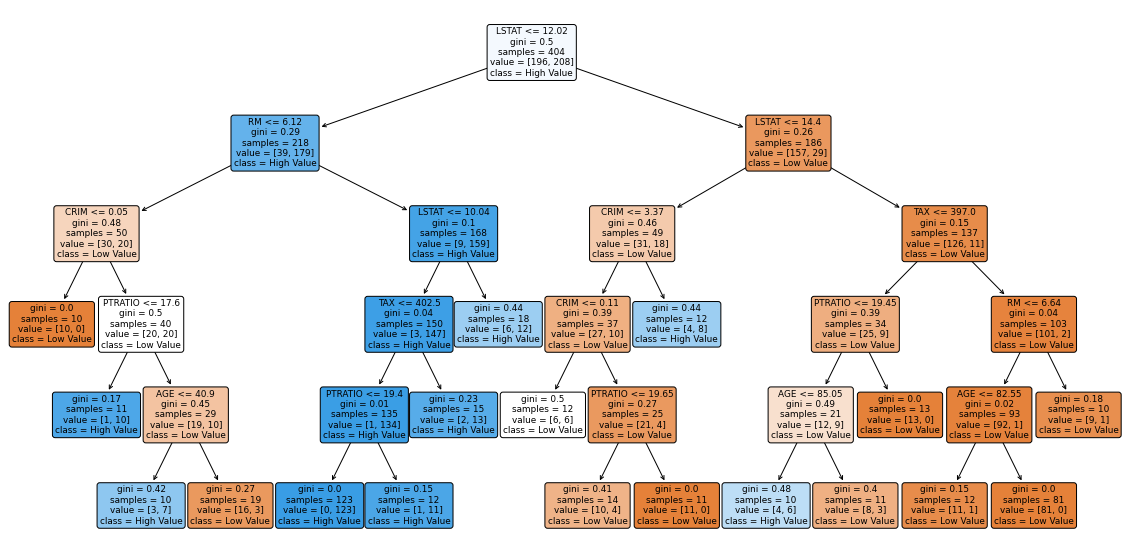

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plot_tree(best_classifier, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['Low Value', 'High Value'],
          rounded=True, 
          proportion=False, 
          precision=2)
plt.show()


In this experiment, we trained and evaluated a decision tree classifier using the Boston housing dataset. Through visual representation, we were able to intuitively understand the decision-making process of the model and how it differentiates between housing price categories based on various features. We determined the best model parameters: unrestricted maximum depth (max_depth: None), a minimum sample split of 2 (min_samples_split: 2), and a minimum of 10 samples per leaf (min_samples_leaf: 10).

The classification report showed that the model achieved an accuracy of 83% on the test set, with a precision of 91% and recall of 80% for lower-value houses, and a precision of 76% and recall of 88% for higher-value houses. This indicates that the model performs slightly better in distinguishing higher-value houses. Overall, the macro average precision, recall, and F1-score all reached or exceeded 83%, indicating that the model has a good balance and generalization ability.

### 4. Use sklearn.tree.DecisionTreeRegressor

We Use the Use sklearn. Tree. DecisionTreeRegressor to build a regression model of task, and let him training and assessment, get the results back to the task

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The same data split is used
y_regr = boston_df['MEDV']

# Set the parameter grid for the decision tree regressor
param_grid_regr = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dtr = DecisionTreeRegressor(random_state=42)
grid_search_regr = GridSearchCV(estimator=dtr, param_grid=param_grid_regr, cv=5, scoring='neg_mean_squared_error')

grid_search_regr.fit(X_train, y_train)

best_regressor = grid_search_regr.best_estimator_
best_params_regr = grid_search_regr.best_params_

y_pred_regr = best_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_regr)
r2 = r2_score(y_test, y_pred_regr)

# Best parameters for the regressor
best_params_regr_display = f"### Best Parameters for Regressor:\n- **Max Depth**: {best_params_regr['max_depth']}\n- **Min Samples Split**: {best_params_regr['min_samples_split']}\n- **Min Samples Leaf**: {best_params_regr['min_samples_leaf']}"
display(Markdown(best_params_regr_display))

# Regression metrics
regression_metrics_display = f"### Regression Metrics:\n- **Mean Squared Error (MSE)**: {mse:.4f}\n- **R-squared (R²)**: {r2:.4f}"
display(Markdown(regression_metrics_display))

### Best Parameters for Regressor:
- **Max Depth**: 5
- **Min Samples Split**: 2
- **Min Samples Leaf**: 5

### Regression Metrics:
- **Mean Squared Error (MSE)**: 0.0968
- **R-squared (R²)**: 0.6003

visual

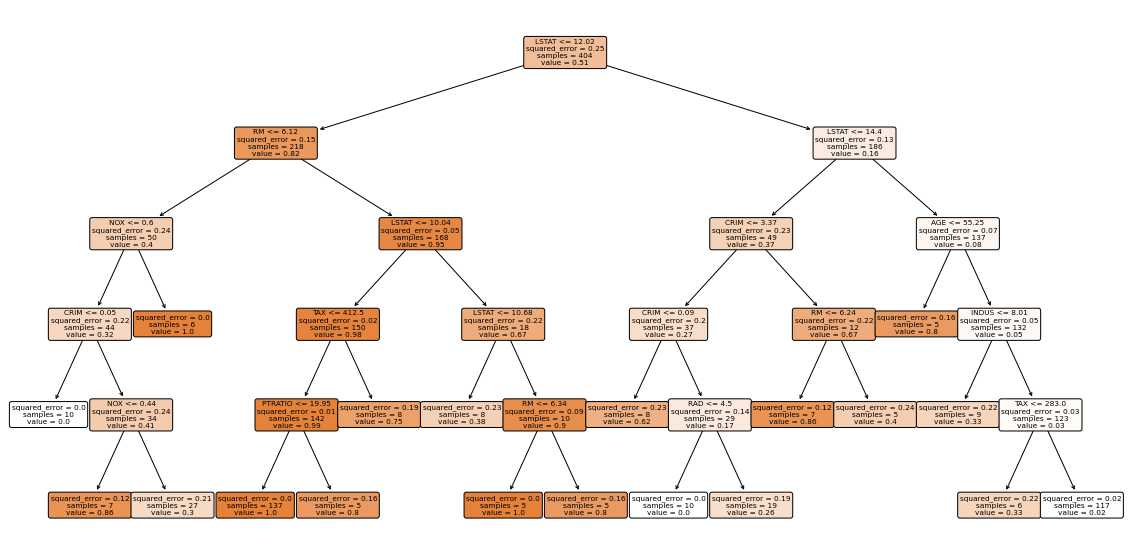

In [15]:
plt.figure(figsize=(20,10))
plot_tree(best_regressor, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          precision=2)
plt.show()


Based on the results obtained from the decision tree regressor applied to the Boston housing dataset, we have successfully identified the optimal parameters for this model. With a max depth of 5, a minimum sample split of 2, and a minimum samples per leaf of 5, the model demonstrates a balance between learning from the data and avoiding overfitting.

The regressor achieved a mean squared error (MSE) of 0.0968 and an R-squared (R²) value of 0.6003. These metrics indicate that while the model has a reasonable degree of predictive power, capturing around 60% of the variance in the housing prices, there is still room for improvement. The MSE value suggests that on average, the model's predictions deviate from the actual values by a relatively small margin, but we should continue to explore ways to reduce this error further.